In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Đảm bảo có punkt (và punkt_tab nếu NLTK mới)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    try:
        nltk.download('punkt_tab')
    except Exception:
        pass  # ignore nếu NLTK bản cũ không có punkt_tab

pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", 100)


In [ ]:
!pip install pandas seaborn matplotlib 

ERROR: Could not find a version that satisfies the requirement ntnk (from versions: none)
ERROR: No matching distribution found for ntnk


In [27]:
df = pd.read_csv('data/vihallu-train.csv')

In [28]:
df.head()

,id,context,prompt,response,label
0,9b1ea51d-d1ff-45ba-8cf1-6a91328e8600,"Vào những năm 1870, hai nhà điêu khắc Augustus...","Vào những năm 1960, nơi nào trở thành trung tâ...",Quảng trường Washington là trung tâm của thế h...,extrinsic
1,db7a89c6-2a6a-42af-beef-58e557ecc819,Cách mạng Tháng Mười đã biến một cuộc chiến tr...,Cách mạng Tháng Mười đã khởi xướng chủ nghĩa p...,Sai. Cách mạng Tháng Mười đã đánh bại chủ nghĩ...,no
2,10fca062-d343-4eca-8434-93c7a8aa5e0e,Vị trí địa lý nằm giữa phương Đông và Địa Trun...,Dựa trên việc Đế quốc Ottoman không bao giờ ki...,Nền ẩm thực của Thổ Nhĩ Kỳ được xây dựng từ gi...,extrinsic
3,ece8eb9e-d6bb-407a-a567-d9531861c603,"Hồ Quý Ly trước có tên là Lê Quý Ly (黎季犛), biể...",Đời cháu thứ 12 của Hồ Hưng Dật sống ở đâu?,"Đời cháu thứ 12 của Hồ Hưng Dật, là Hồ Liêm, s...",no
4,b613217f-df2a-491e-8326-25811a31eb09,"Năm 2007, Bồ Đào Nha có khoảng 332.137 người n...","Từ thập niên 1990, tại sao xuất hiện một vài l...",Mặc dù Bồ Đào Nha đã đóng cửa biên giới hoàn t...,intrinsic


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7000 non-null   object
 1   context   7000 non-null   object
 2   prompt    7000 non-null   object
 3   response  7000 non-null   object
 4   label     7000 non-null   object
dtypes: object(5)
memory usage: 273.6+ KB


In [30]:
df.isnull().sum()

id          0
context     0
prompt      0
response    0
label       0
dtype: int64

In [31]:
df.describe()

,id,context,prompt,response,label
count,7000,7000,7000,7000,7000
unique,7000,3865,7000,7000,3
top,7513ce4c-3959-4f1a-a197-fb66449f90a7,"Nguyên thủ quốc gia là ""Tổng thống của nước Cộ...",Nguồn thhu chinh của thuê truc tiếp la nhủg ai?,Các nguồn thu chính của thuế trực tiếp bao gồm...,intrinsic
freq,1,5,1,1,2448


label
intrinsic    2448
extrinsic    2307
no           2245
Name: count, dtype: int64


<Axes: xlabel='label'>

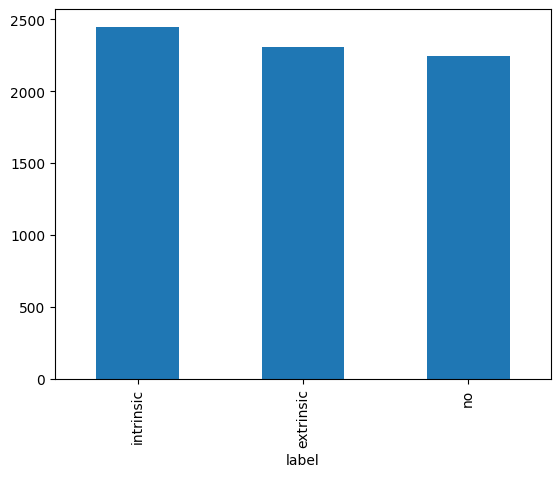

In [32]:
print( df['label'].value_counts() )
df['label'].value_counts().plot(kind='bar')

In [33]:
no_df = df[df['label'] == 'no']
intrinsic_df = df[df['label'] == 'intrinsic']
extrinsic_df = df[df['label'] == 'extrinsic']

dfs = [no_df, intrinsic_df, extrinsic_df]

In [40]:
import nltk

# đảm bảo có 'punkt'
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

# nhiều bản NLTK mới cần thêm 'punkt_tab'
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    try:
        nltk.download('punkt_tab')
    except Exception:
        # nếu bản NLTK cũ không có 'punkt_tab' thì bỏ qua
        pass

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [41]:
for df_ in dfs:
    df_['num_words'] = df_['context'].apply(lambda x: len(word_tokenize(x)))
    df_['num_sentences'] = df_['context'].apply(lambda x: len(sent_tokenize(x)))
    df_['avg_word_length'] = df_['context'].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))

C:\Users\DT\AppData\Local\Temp\ipykernel_9628\1470601062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['num_words'] = df_['context'].apply(lambda x: len(word_tokenize(x)))
C:\Users\DT\AppData\Local\Temp\ipykernel_9628\1470601062.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['num_sentences'] = df_['context'].apply(lambda x: len(sent_tokenize(x)))
C:\Users\DT\AppData\Local\Temp\ipykernel_9628\1470601062.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

C:\Users\DT\AppData\Local\Temp\ipykernel_9628\732922740.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])


<Figure size 1500x1000 with 0 Axes>

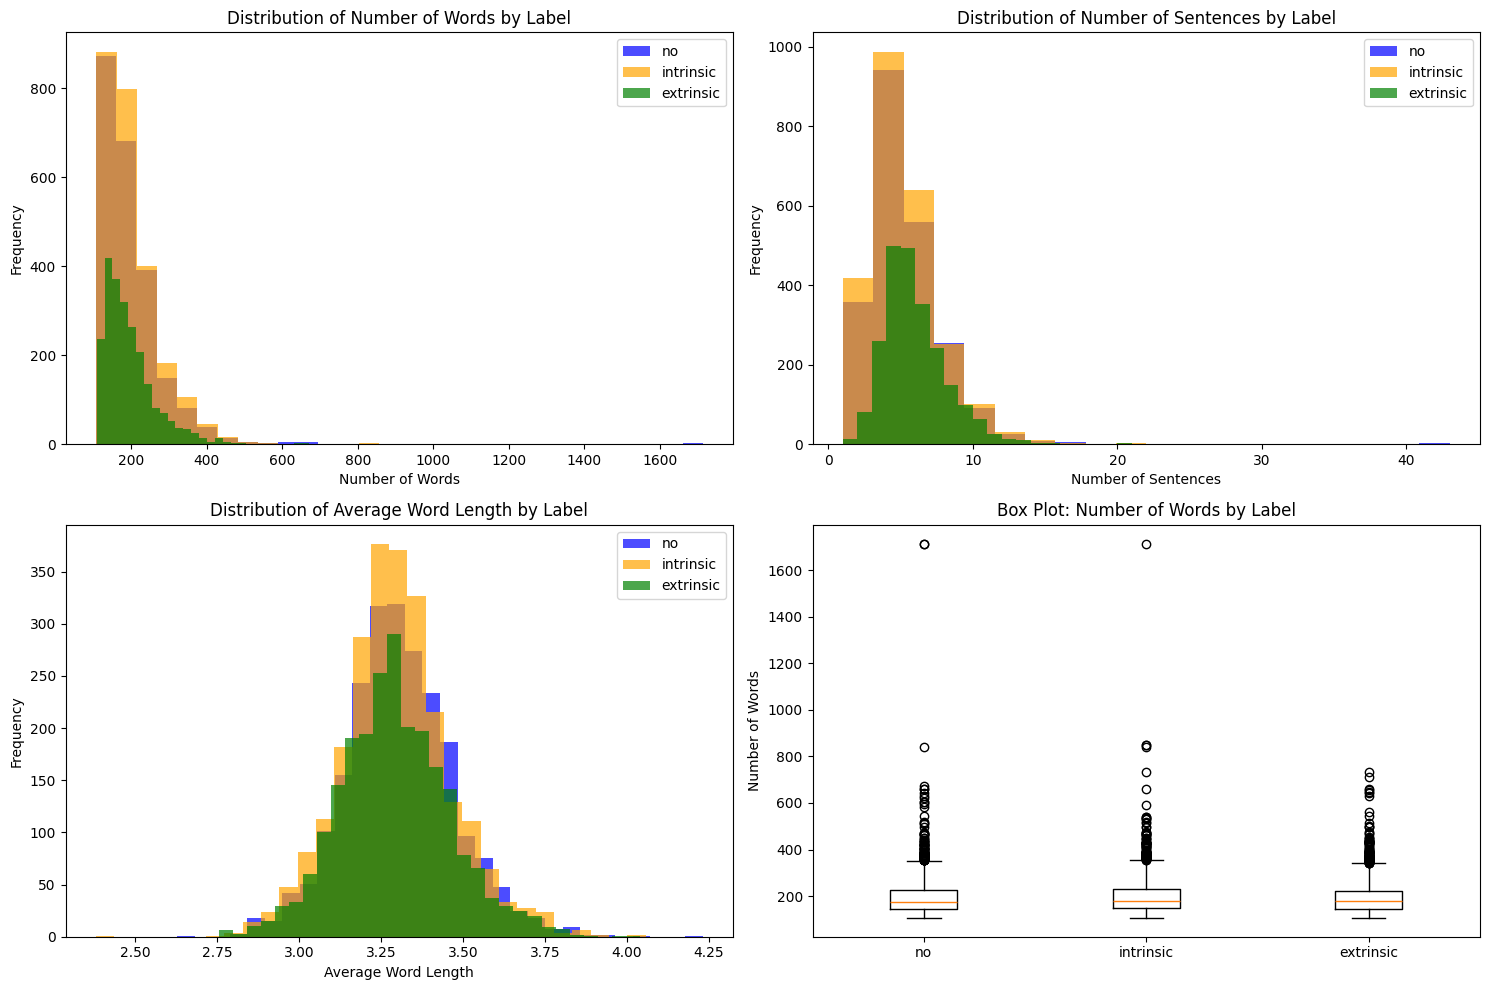

In [42]:
plt.figure(figsize=(15, 10))

# Create subplots for different metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Number of words distribution
axes[0, 0].hist(no_df['num_words'], alpha=0.7, label='no', bins=30, color='blue')
axes[0, 0].hist(intrinsic_df['num_words'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[0, 0].hist(extrinsic_df['num_words'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Number of Words by Label')
axes[0, 0].legend()

# Plot 2: Number of sentences distribution
axes[0, 1].hist(no_df['num_sentences'], alpha=0.7, label='no', bins=20, color='blue')
axes[0, 1].hist(intrinsic_df['num_sentences'], alpha=0.7, label='intrinsic', bins=20, color='orange')
axes[0, 1].hist(extrinsic_df['num_sentences'], alpha=0.7, label='extrinsic', bins=20, color='green')
axes[0, 1].set_xlabel('Number of Sentences')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Number of Sentences by Label')
axes[0, 1].legend()

# Plot 3: Average word length distribution
axes[1, 0].hist(no_df['avg_word_length'], alpha=0.7, label='no', bins=30, color='blue')
axes[1, 0].hist(intrinsic_df['avg_word_length'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[1, 0].hist(extrinsic_df['avg_word_length'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[1, 0].set_xlabel('Average Word Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Average Word Length by Label')
axes[1, 0].legend()

# Plot 4: Box plot comparison
data_to_plot = [no_df['num_words'], intrinsic_df['num_words'], extrinsic_df['num_words']]
axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])
axes[1, 1].set_ylabel('Number of Words')
axes[1, 1].set_title('Box Plot: Number of Words by Label')

plt.tight_layout()
plt.show()

In [43]:
from nltk.tokenize import word_tokenize, sent_tokenize

for df_ in dfs:
    df_['num_words'] = df_['prompt'].apply(lambda x: len(word_tokenize(x)))
    df_['num_sentences'] = df_['prompt'].apply(lambda x: len(sent_tokenize(x)))
    df_['avg_word_length'] = df_['prompt'].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))

C:\Users\DT\AppData\Local\Temp\ipykernel_9628\692363079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['num_words'] = df_['prompt'].apply(lambda x: len(word_tokenize(x)))
C:\Users\DT\AppData\Local\Temp\ipykernel_9628\692363079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['num_sentences'] = df_['prompt'].apply(lambda x: len(sent_tokenize(x)))
C:\Users\DT\AppData\Local\Temp\ipykernel_9628\692363079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

C:\Users\DT\AppData\Local\Temp\ipykernel_9628\732922740.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])


<Figure size 1500x1000 with 0 Axes>

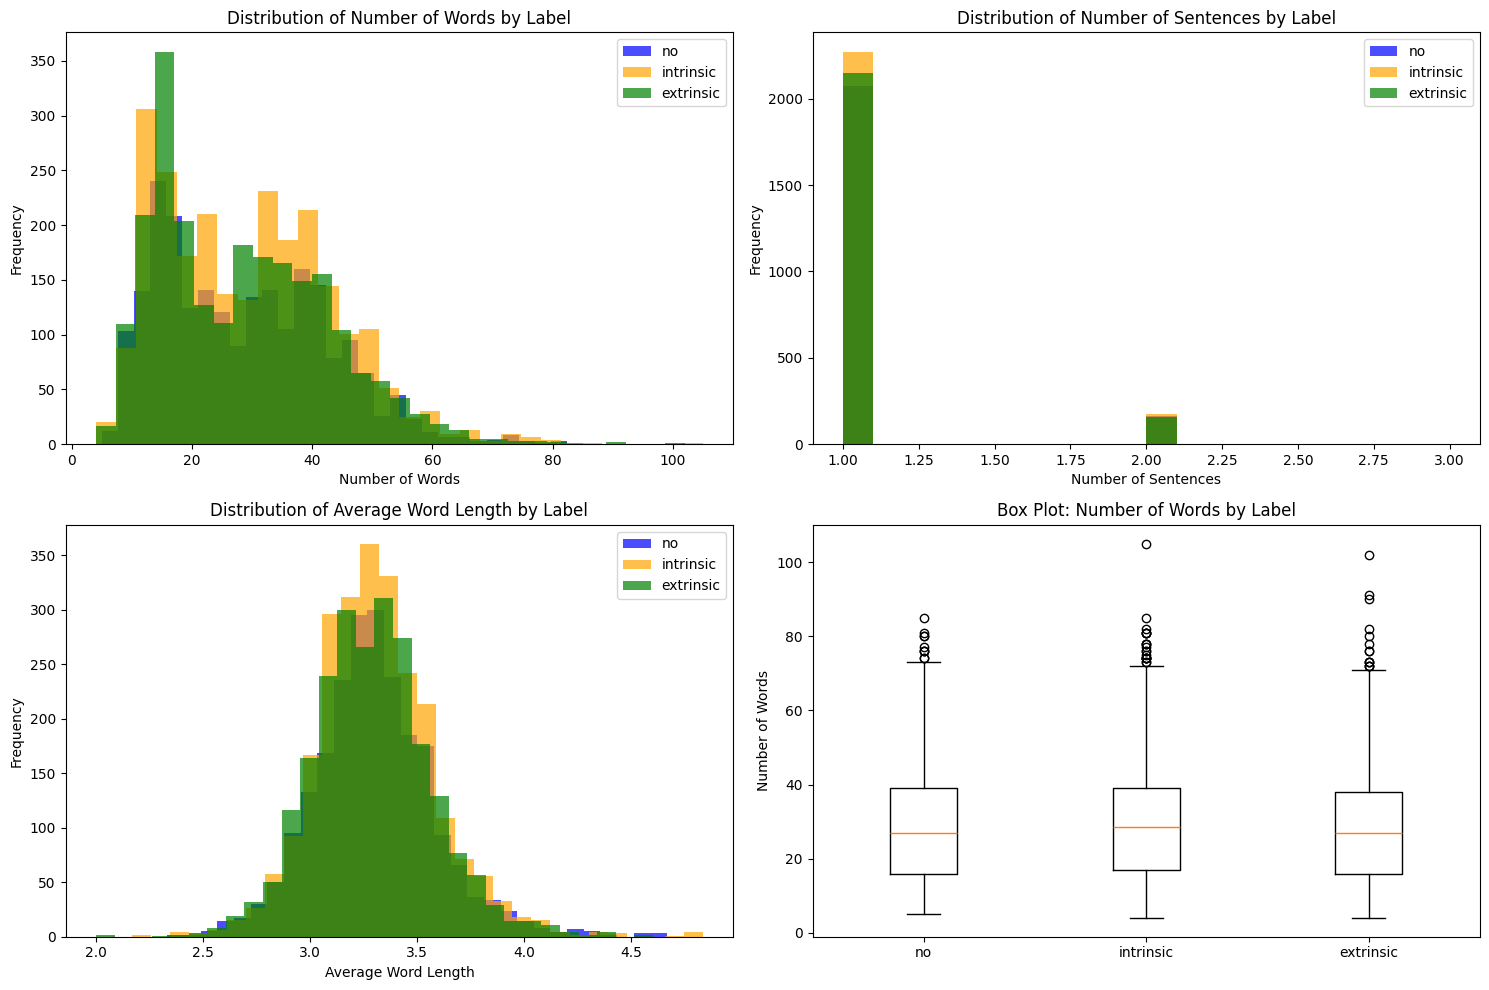

In [44]:
plt.figure(figsize=(15, 10))

# Create subplots for different metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Number of words distribution
axes[0, 0].hist(no_df['num_words'], alpha=0.7, label='no', bins=30, color='blue')
axes[0, 0].hist(intrinsic_df['num_words'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[0, 0].hist(extrinsic_df['num_words'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Number of Words by Label')
axes[0, 0].legend()

# Plot 2: Number of sentences distribution
axes[0, 1].hist(no_df['num_sentences'], alpha=0.7, label='no', bins=20, color='blue')
axes[0, 1].hist(intrinsic_df['num_sentences'], alpha=0.7, label='intrinsic', bins=20, color='orange')
axes[0, 1].hist(extrinsic_df['num_sentences'], alpha=0.7, label='extrinsic', bins=20, color='green')
axes[0, 1].set_xlabel('Number of Sentences')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Number of Sentences by Label')
axes[0, 1].legend()

# Plot 3: Average word length distribution
axes[1, 0].hist(no_df['avg_word_length'], alpha=0.7, label='no', bins=30, color='blue')
axes[1, 0].hist(intrinsic_df['avg_word_length'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[1, 0].hist(extrinsic_df['avg_word_length'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[1, 0].set_xlabel('Average Word Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Average Word Length by Label')
axes[1, 0].legend()

# Plot 4: Box plot comparison
data_to_plot = [no_df['num_words'], intrinsic_df['num_words'], extrinsic_df['num_words']]
axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])
axes[1, 1].set_ylabel('Number of Words')
axes[1, 1].set_title('Box Plot: Number of Words by Label')

plt.tight_layout()
plt.show()

In [45]:
from nltk.tokenize import word_tokenize, sent_tokenize

for df_ in dfs:
    df_['num_words'] = df_['response'].apply(lambda x: len(word_tokenize(x)))
    df_['num_sentences'] = df_['response'].apply(lambda x: len(sent_tokenize(x)))
    df_['avg_word_length'] = df_['response'].apply(lambda x: np.mean([len(word) for word in word_tokenize(x)]))

C:\Users\DT\AppData\Local\Temp\ipykernel_9628\750039840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['num_words'] = df_['response'].apply(lambda x: len(word_tokenize(x)))
C:\Users\DT\AppData\Local\Temp\ipykernel_9628\750039840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['num_sentences'] = df_['response'].apply(lambda x: len(sent_tokenize(x)))
C:\Users\DT\AppData\Local\Temp\ipykernel_9628\750039840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

C:\Users\DT\AppData\Local\Temp\ipykernel_9628\732922740.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])


<Figure size 1500x1000 with 0 Axes>

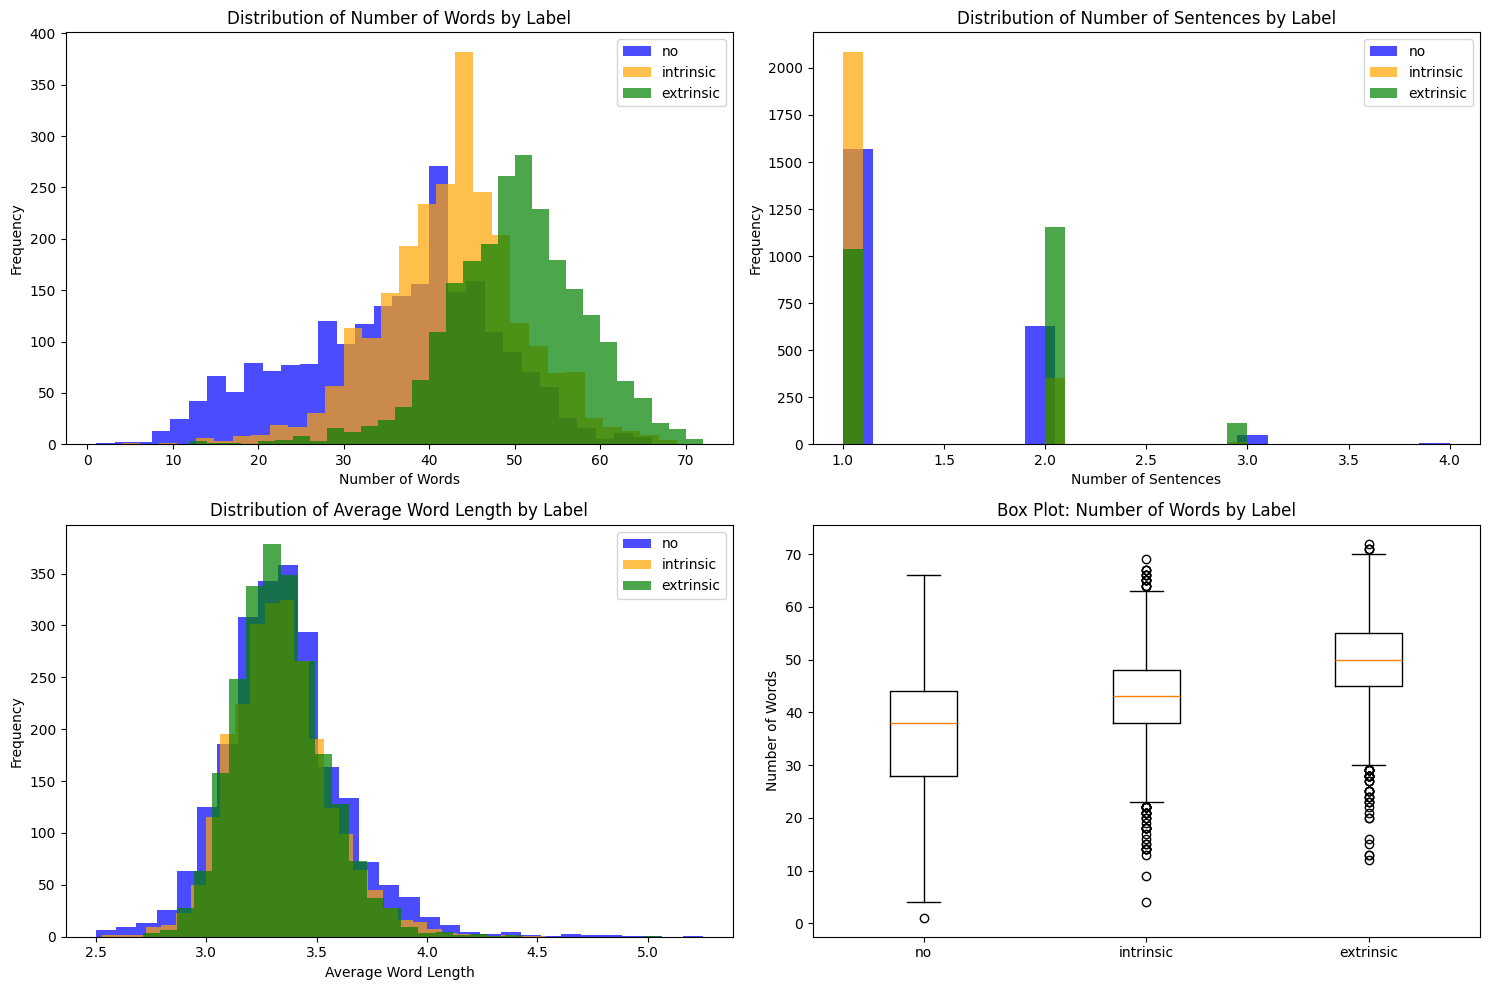

In [46]:
plt.figure(figsize=(15, 10))

# Create subplots for different metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Number of words distribution
axes[0, 0].hist(no_df['num_words'], alpha=0.7, label='no', bins=30, color='blue')
axes[0, 0].hist(intrinsic_df['num_words'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[0, 0].hist(extrinsic_df['num_words'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Number of Words by Label')
axes[0, 0].legend()

# Plot 2: Number of sentences distribution
axes[0, 1].hist(no_df['num_sentences'], alpha=0.7, label='no', bins=20, color='blue')
axes[0, 1].hist(intrinsic_df['num_sentences'], alpha=0.7, label='intrinsic', bins=20, color='orange')
axes[0, 1].hist(extrinsic_df['num_sentences'], alpha=0.7, label='extrinsic', bins=20, color='green')
axes[0, 1].set_xlabel('Number of Sentences')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Number of Sentences by Label')
axes[0, 1].legend()

# Plot 3: Average word length distribution
axes[1, 0].hist(no_df['avg_word_length'], alpha=0.7, label='no', bins=30, color='blue')
axes[1, 0].hist(intrinsic_df['avg_word_length'], alpha=0.7, label='intrinsic', bins=30, color='orange')
axes[1, 0].hist(extrinsic_df['avg_word_length'], alpha=0.7, label='extrinsic', bins=30, color='green')
axes[1, 0].set_xlabel('Average Word Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Average Word Length by Label')
axes[1, 0].legend()

# Plot 4: Box plot comparison
data_to_plot = [no_df['num_words'], intrinsic_df['num_words'], extrinsic_df['num_words']]
axes[1, 1].boxplot(data_to_plot, labels=['no', 'intrinsic', 'extrinsic'])
axes[1, 1].set_ylabel('Number of Words')
axes[1, 1].set_title('Box Plot: Number of Words by Label')

plt.tight_layout()
plt.show()

In [47]:
# Choose random 20 indices from intrinsic and extrinsic dataframes
intrinsic_sample = intrinsic_df.sample(n=20, random_state=42)
extrinsic_sample = extrinsic_df.sample(n=20, random_state=42)

print("=== INTRINSIC PROMPTS (20 samples) ===")
for i, prompt in enumerate(intrinsic_sample['prompt'], 1):
    print(f"{i}. {prompt}")
    print("-" * 50)

print("\n=== EXTRINSIC PROMPTS (20 samples) ===")
for i, prompt in enumerate(extrinsic_sample['prompt'], 1):
    print(f"{i}. {prompt}")
    print("-" * 50)

=== INTRINSIC PROMPTS (20 samples) ===
1. Tông tài Tưởng Giới Thạch từ trần vào khi nàoa?
--------------------------------------------------
2. Từ khi nào thì khu vực thuộc châu Âu của Thổ Nhĩ Kỳ đã có con người sinh sống, và có đúng là họ chỉ bắt đầu canh tác nông nghiệp sau cuộc chinh phục của Alexandros Đại đế không?
--------------------------------------------------
3. Soo luong phong cách kến trúc phổ bién nhát tại nộii ô Bắc Kinh là bao nhieu?
--------------------------------------------------
4. Sau khi hai thánh Pedro và Paul tử đạo tại thành Roma, thành phố có trở thành trung tâm của đạo Hồi không, và nếu không, thì những thay đổi nào đã diễn ra?
--------------------------------------------------
5. Thập Sát Hải là tên gọi chung của các hồ nào, và có phải chúng đã được xây dựng hoàn toàn vào thời nhà Minh mà không hề có sự can thiệp từ các triều đại khác?
--------------------------------------------------
6. Tại sao các nghị sĩ, mặc dù bị kiểm soát hoàn toàn bởi các chính đảng

Text(0.5, 1.0, 'Distribution of Context Lengths')

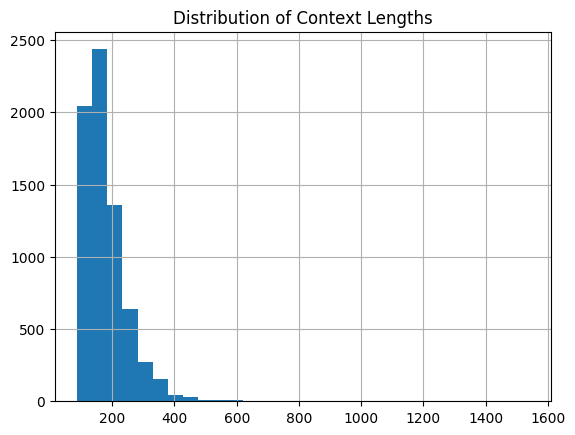

In [48]:
df['context'].apply(lambda x: len(x.split())).hist(bins=30)
plt.title('Distribution of Context Lengths')